# 案例：给定一个二维数组，使用Kmeans进行聚类

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
data1 = sio.loadmat('E:/ML_NG/7-kmeans and PCA/data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X = data1['X']
X.shape

(300, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

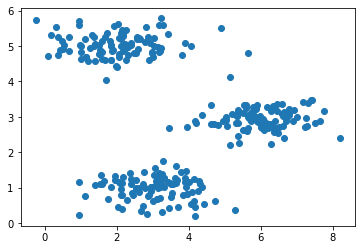

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show

## 获取每个样本所属类别

In [6]:
def find_centroids(X,centros):
    
    idx = []
    
    for i in range(len(X)):
        #(2,)  (k,2)->(k,2)
        dist = np.linalg.norm((X[i] - centros),axis=1)  #(k,)
        id_i = np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)

In [7]:
centros = np.array([[3,3],[6,2],[8,5]])
idx = find_centroids(X,centros)
idx[:3]   #打印出前三个索引

array([0, 2, 1], dtype=int64)

## 计算聚类中心点

In [9]:
def computer_centros(X,idx,k):
    
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [10]:
computer_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 运行kmean，重复执行1,2

In [16]:
def run_kmeans(X,centors,iters):
    
    k = len(centors)
    centors_all = []
    centors_all.append(centors)
    centors_i = centors
    for i in range(iters):
        idx = find_centroids(X,centors_i)
        centors_i = computer_centros(X,idx,k)
        centors_all.append(centors_i)
        
    return idx,np.array(centors_all)

## 绘制数据集和聚类中心的移动轨迹

In [17]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

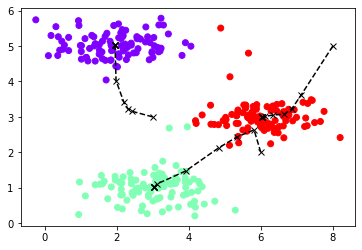

In [18]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

## 观察初始聚类点的位置对聚类效果的影响

In [19]:
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [21]:
init_centros(X,k=3)

array([[1.85776553, 4.86962414],
       [8.20339815, 2.41693495],
       [1.72818199, 5.36028437]])

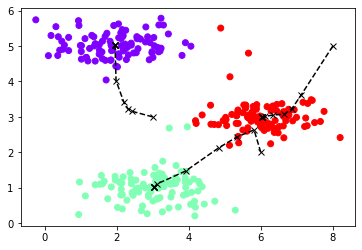

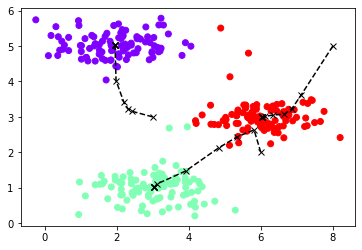

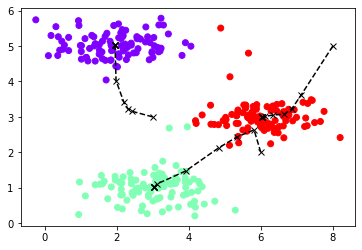

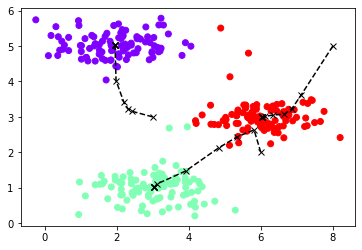

In [22]:
for i in range(4):
    idx,centros_all = run_kmeans(X,centros,iters=10)
    plot_data(X,centros_all,idx)

# 案例：使用kmeans对图片颜色进行分类
     RGB图像，每个像素点范围0-255

In [26]:
data = sio.loadmat('E:/ML_NG/7-kmeans and PCA/data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [27]:
A = data['A']
A.shape

(128, 128, 3)

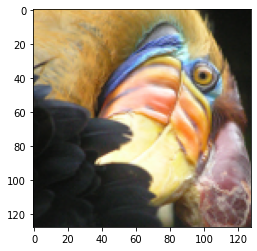

In [29]:
from skimage import io

image = io.imread('E:/ML_NG/7-kmeans and PCA/data/bird_small.png')
plt.imshow(image)

In [36]:
A = A / 255
A = A.reshape(-1,3)

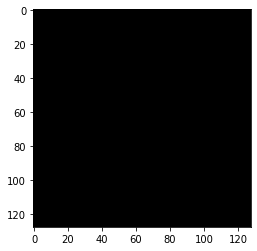

In [37]:
k = 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)

for i in range(k):
    im[idx==i] = centros[i]
    
im = im.reshape(128,128,3)
plt.imshow(im)